In [1]:
#import os
#os.chdir(r'D:\The AI & DS Channel temp\xx_airBnb open data')

In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import missingno as msno
import plotly.express as px

In [4]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.shape

(102599, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [9]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [10]:
df.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [11]:
df.drop(['id','NAME','host id', 'host name','house_rules','license'], axis=1, inplace=True)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(98995, 20)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98995 entries, 0 to 102057
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          98706 non-null  object 
 1   neighbourhood group             98966 non-null  object 
 2   neighbourhood                   98979 non-null  object 
 3   lat                             98987 non-null  float64
 4   long                            98987 non-null  float64
 5   country                         98463 non-null  object 
 6   country code                    98864 non-null  object 
 7   instant_bookable                98890 non-null  object 
 8   cancellation_policy             98919 non-null  object 
 9   room type                       98995 non-null  object 
 10  Construction year               98781 non-null  float64
 11  price                           98748 non-null  object 
 12  service fee                    

In [15]:
percentage_null = df.isnull().sum()/df.shape[0]*100
percentage_null = pd.DataFrame({"columns":percentage_null.keys(), "%":percentage_null})
percentage_null.reset_index(drop=True, inplace=True)
percentage_null

,columns,%
0,host_identity_verified,0.291934
1,neighbourhood group,0.029294
2,neighbourhood,0.016162
3,lat,0.008081
4,long,0.008081
5,country,0.537401
6,country code,0.132330
7,instant_bookable,0.106066
8,cancellation_policy,0.076772
9,room type,0.000000


<AxesSubplot:>

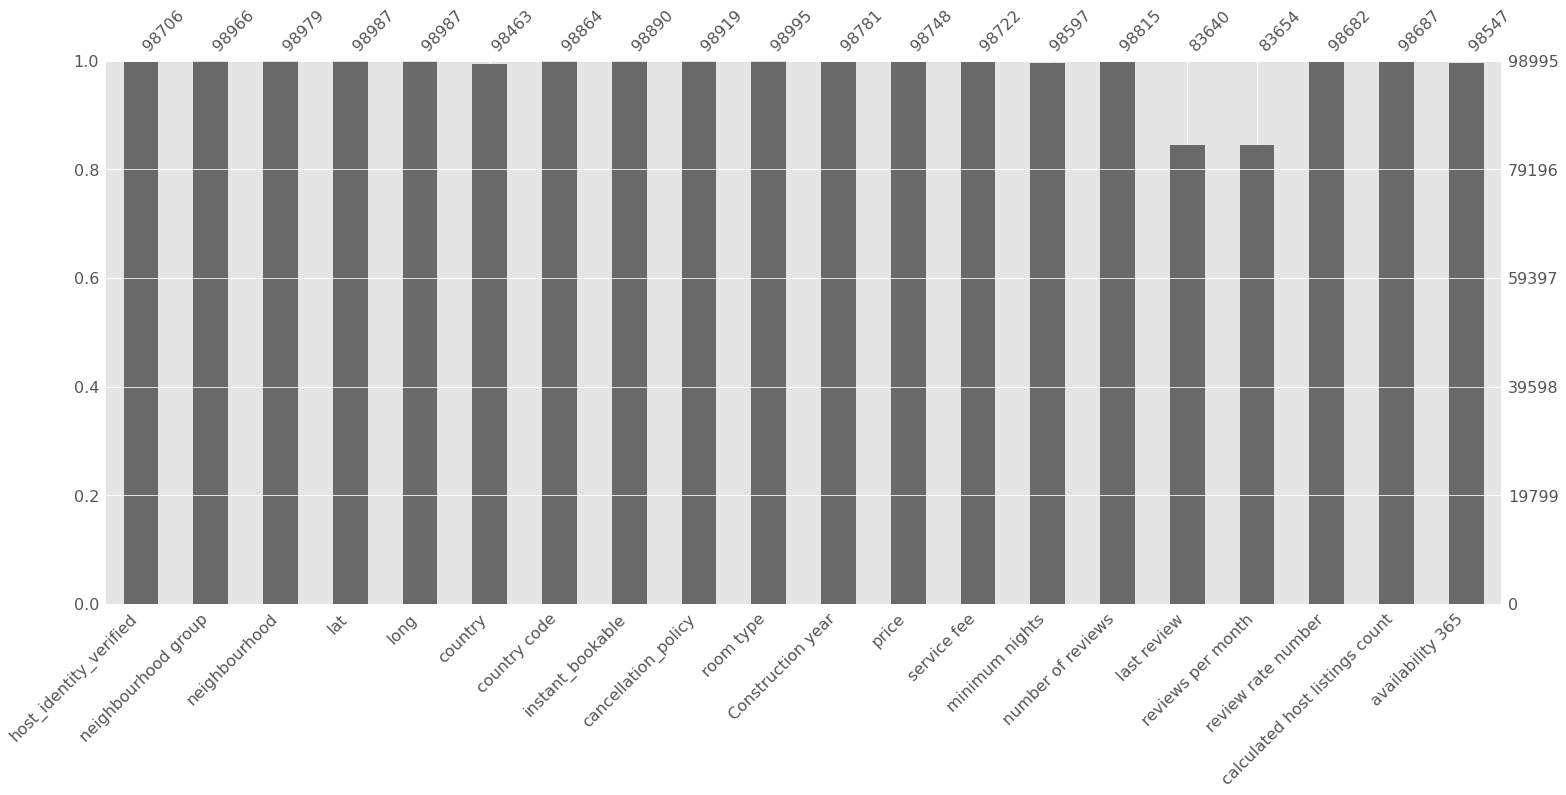

In [16]:
msno.bar(df)

In [17]:
df.columns

Index(['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'lat',
       'long', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [18]:
df.columns = df.columns.str.replace(' ','_')

In [19]:
df.columns

Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'lat',
       'long', 'country', 'country_code', 'instant_bookable',
       'cancellation_policy', 'room_type', 'Construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [20]:
categorical_values = df.select_dtypes(include=[object])
print("Count of categorical features in the dataset:", categorical_values.shape[1])

numerical_values = df.select_dtypes(include=[np.float64, np.int64])
print("Count fo numerical features in the dataset:", numerical_values.shape[1])

Count of categorical features in the dataset: 11
Count fo numerical features in the dataset: 9


In [21]:
categorical_values.head()

,host_identity_verified,neighbourhood_group,neighbourhood,country,country_code,instant_bookable,cancellation_policy,room_type,price,service_fee,last_review
0,unconfirmed,Brooklyn,Kensington,United States,US,False,strict,Private room,$966,$193,10/19/2021
1,verified,Manhattan,Midtown,United States,US,False,moderate,Entire home/apt,$142,$28,5/21/2022
2,NaN,Manhattan,Harlem,United States,US,True,flexible,Private room,$620,$124,NaN
3,unconfirmed,Brooklyn,Clinton Hill,United States,US,True,moderate,Entire home/apt,$368,$74,7/5/2019
4,verified,Manhattan,East Harlem,United States,US,False,moderate,Entire home/apt,$204,$41,11/19/2018


In [22]:
numerical_values.head()

,lat,long,Construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0
2,40.80902,-73.94190,2005.0,3.0,0.0,NaN,5.0,1.0,352.0
3,40.68514,-73.95976,2005.0,30.0,270.0,4.64,4.0,1.0,322.0
4,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0


In [23]:
categorical_values.isnull().sum()

host_identity_verified      289
neighbourhood_group          29
neighbourhood                16
country                     532
country_code                131
instant_bookable            105
cancellation_policy          76
room_type                     0
price                       247
service_fee                 273
last_review               15355
dtype: int64

<AxesSubplot:xlabel='host_identity_verified', ylabel='count'>

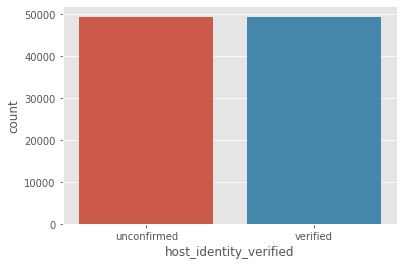

In [24]:
sns.countplot(x='host_identity_verified', data=df)

<AxesSubplot:ylabel='host_identity_verified'>

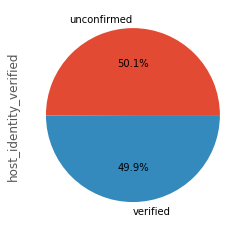

In [25]:
data = df['host_identity_verified'].value_counts()
data.plot(kind='pie', autopct='%0.1f%%')

In [26]:
df['host_identity_verified'].value_counts()

unconfirmed    49421
verified       49285
Name: host_identity_verified, dtype: int64

In [27]:
df['host_identity_verified'].fillna('unconfirmed', inplace=True)

In [28]:
df['host_identity_verified'].isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='neighbourhood_group'>

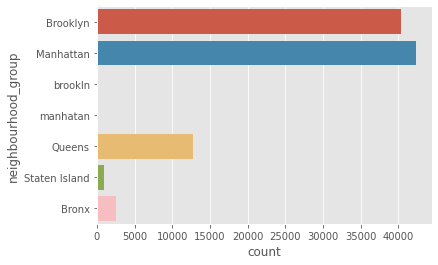

In [29]:
sns.countplot(y='neighbourhood_group', data=df)

In [30]:
df['neighbourhood_group'].value_counts()

Manhattan        42304
Brooklyn         40330
Queens           12806
Bronx             2609
Staten Island      915
manhatan             1
brookln              1
Name: neighbourhood_group, dtype: int64

In [31]:
df.replace({'neighbourhood_group': {'brookln':'Brooklyn', 'manhatan':'Manhattan'}}, inplace=True)

In [32]:
df['neighbourhood_group'].nunique()

5

In [33]:
df['neighbourhood_group'].fillna('Manhattan', inplace=True)

In [34]:
df['neighbourhood'].value_counts()

Bedford-Stuyvesant            7666
Williamsburg                  7457
Harlem                        5296
Bushwick                      4807
Hell's Kitchen                3853
                              ... 
Bay Terrace, Staten Island       3
Glen Oaks                        2
Fort Wadsworth                   2
Rossville                        2
Chelsea, Staten Island           1
Name: neighbourhood, Length: 224, dtype: int64

In [35]:
neighbourhood_count = df['neighbourhood'].value_counts()
top_15 = neighbourhood_count.head(15)

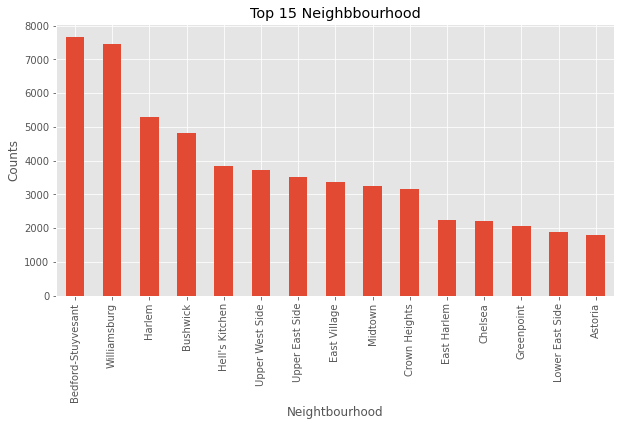

In [36]:
top_15.plot(kind='bar', figsize=(10,5))
plt.xlabel('Neightbourhood')
plt.ylabel('Counts')
plt.title('Top 15 Neighbbourhood')
plt.show()

In [37]:
df['country'].nunique()

1

In [38]:
df['country'].value_counts()

United States    98463
Name: country, dtype: int64

In [39]:
df['country'].fillna('United States', inplace=True)

In [40]:
df['country_code'].isnull().sum()

131

In [41]:
df['country_code'].value_counts()

US    98864
Name: country_code, dtype: int64

In [42]:
df['country_code'].fillna('US', inplace=True)

<AxesSubplot:ylabel='instant_bookable'>

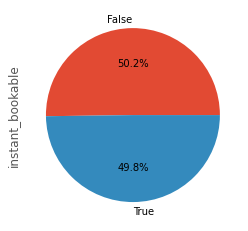

In [43]:
data = df['instant_bookable'].value_counts()
data.plot(kind='pie', autopct='%0.1f%%')

In [45]:
!pip install plotly.validators.scatter3d

ERROR: Could not find a version that satisfies the requirement plotly.validators.scatter3d (from versions: none)
ERROR: No matching distribution found for plotly.validators.scatter3d


In [44]:
df['tmp'] =1
fig=px.pie(df, names='instant_bookable', values='tmp', hole=0.6, title="instant_bookable")
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_text='instant_bookable', annotations=[dict(text='instant_bookable', x=0.5, y=0.5, font_size=10, showarrow=False)])

ModuleNotFoundError: No module named 'plotly.validators.scatter3d'

In [ ]:
df['instant_bookable'].fillna('false', inplace=True)

In [ ]:
df['cancellation_policy'].nunique()

In [ ]:
sns.countplot(x='cancellation_policy', data=df)

In [ ]:
df['cancellation_policy'].value_counts()

In [ ]:
df['cancellation_policy'].fillna('moderate', inplace=True)

In [ ]:
sns.countplot(x='room_type', data=df)

In [ ]:
df['room_type'].value_counts()

In [ ]:
df['room_type'].fillna('Entire home/apt', inplace=True)

In [ ]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

In [ ]:
df['price'] = df['price'].apply(lambda x:remove_dollar_sign(x))
df['service_fee'] = df['service_fee'].apply(lambda x:remove_dollar_sign(x))

In [ ]:
df['price']

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Relationship between price and service fee")
sns.scatterplot(x=df.price, y=df.service_fee, hue=df.room_type, s=30);

In [ ]:
df['last_review']

In [ ]:
def get_year(date):
    try:
        return str(date).split("/")[2]
    except:
        pass
    
df['last_review'] = df['last_review'].apply(get_year)

In [ ]:
df['last_review']

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(y='last_review', data=df, ax=ax)

In [ ]:
df['last_review'].median()

In [ ]:
df['last_review'].fillna(2019, inplace=True)

In [ ]:
df['last_review'].isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
year=df['Construction_year'].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index, y=year.values)
plt.xlabel("Construction year")
plt.ylabel("Count")
plt.title("Consruction year")

In [ ]:
df['Construction_year'].isnull().sum()

In [ ]:
mode = df['Construction_year'].mode().iloc[0]
mode

In [ ]:
df['Construction_year'].fillna(2014, inplace=True)

In [ ]:
fig = px.histogram(df, x='availability_365')
fig.show()

In [ ]:
df['minimum_nights'].fillna(df['minimum_nights'].mode()[0], inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0], inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0], inplace=True)
df['review_rate_number'].fillna(df['review_rate_number'].mode()[0], inplace=True)
df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].mode()[0], inplace=True)
df['availability_365'].fillna(df['availability_365'].mode()[0], inplace=True)

In [ ]:
numerical_values.isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

In [ ]:
df.corr()

In [ ]:
df.drop('tmp', axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()